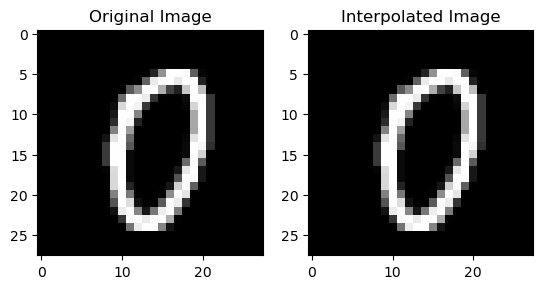

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

# Function to compute divided differences
def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:, 0] = y  # the first column is y
    
    for j in range(1, n):
        for i in range(n - j):
            coef[i, j] = (coef[i + 1, j - 1] - coef[i, j - 1]) / (x[i + j] - x[i])
    
    return coef[0, :]  # return only the first row (Newton's coefficients)

# Function to evaluate Newton polynomial at given points
def newton_poly(x, x_data, coef):
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1, n+1):
        p = coef[n-k] + (x - x_data[n-k]) * p
    return p

# Function to interpolate 1D data using Newton's method
def interpolate_1d(x_vals, y_vals, new_x_vals):
    coef = divided_diff(x_vals, y_vals)
    return newton_poly(new_x_vals, x_vals, coef)

# Function to apply Newton's interpolation to 2D image
def interpolate_image_newton(image_array):
    # Step 1: Interpolate along rows
    interpolated_rows = []
    x_vals = np.arange(image_array.shape[1])  # Original x-values
    
    for row in image_array:
        new_x_vals = np.linspace(0, image_array.shape[1] - 1, num=image_array.shape[1])  # Generate new x-values
        interpolated_row = interpolate_1d(x_vals, row, new_x_vals)
        interpolated_rows.append(interpolated_row)
    
    interpolated_rows = np.array(interpolated_rows)

    # Step 2: Interpolate along columns
    interpolated_image = []
    x_vals = np.arange(interpolated_rows.shape[0])

    for i in range(interpolated_rows.shape[1]):
        new_x_vals = np.linspace(0, interpolated_rows.shape[0] - 1, num=interpolated_rows.shape[0])
        interpolated_column = interpolate_1d(x_vals, interpolated_rows[:, i], new_x_vals)
        interpolated_image.append(interpolated_column)

    interpolated_image = np.array(interpolated_image).T  # Transpose to get correct shape
    
    return interpolated_image

# Step 3: Load and process the image
image = cv2.imread(r'D:\GIKI\7th semester\CE442L\Mid exam prep\img.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
image_array = np.array(gray_image)  # Ensure you're working with a 2D grayscale image

# Step 4: Apply Newton's interpolation
interpolated_image = interpolate_image_newton(image_array)

# Step 5: Visualize the original and interpolated images
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_array, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Interpolated Image")
plt.imshow(interpolated_image, cmap='gray')
plt.show()


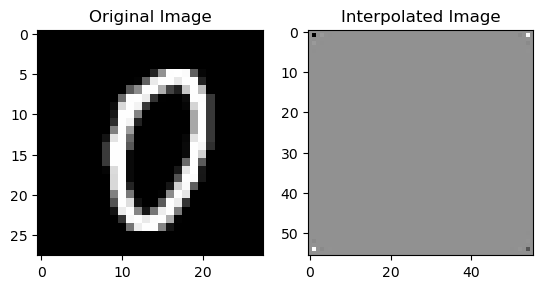

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

# Function to compute divided differences
def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:, 0] = y  # the first column is y
    
    for j in range(1, n):
        for i in range(n - j):
            coef[i, j] = (coef[i + 1, j - 1] - coef[i, j - 1]) / (x[i + j] - x[i])
    
    return coef[0, :]  # return only the first row (Newton's coefficients)

# Function to evaluate Newton polynomial at given points
def newton_poly(x, x_data, coef):
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1, n+1):
        p = coef[n-k] + (x - x_data[n-k]) * p
    return p

# Function to interpolate 1D data using Newton's method
def interpolate_1d(x_vals, y_vals, new_x_vals):
    coef = divided_diff(x_vals, y_vals)
    return newton_poly(new_x_vals, x_vals, coef)

# Function to apply Newton's interpolation to 2D image
def interpolate_image_newton(image_array, scale_factor=2):
    # Step 1: Interpolate along rows
    interpolated_rows = []
    x_vals = np.arange(image_array.shape[1])  # Original x-values
    
    for row in image_array:
        new_x_vals = np.linspace(0, image_array.shape[1] - 1, num=scale_factor * image_array.shape[1])  # Double the number of x-values
        interpolated_row = interpolate_1d(x_vals, row, new_x_vals)
        interpolated_rows.append(interpolated_row)
    
    interpolated_rows = np.array(interpolated_rows)

    # Step 2: Interpolate along columns
    interpolated_image = []
    x_vals = np.arange(interpolated_rows.shape[0])

    for i in range(interpolated_rows.shape[1]):
        new_x_vals = np.linspace(0, interpolated_rows.shape[0] - 1, num=scale_factor * interpolated_rows.shape[0])  # Double the number of y-values
        interpolated_column = interpolate_1d(x_vals, interpolated_rows[:, i], new_x_vals)
        interpolated_image.append(interpolated_column)

    interpolated_image = np.array(interpolated_image).T  # Transpose to get correct shape
    
    return interpolated_image

# Step 3: Load and process the image
image = cv2.imread(r'D:\GIKI\7th semester\CE442L\Mid exam prep\img.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
image_array = np.array(gray_image)  # Ensure you're working with a 2D grayscale image

# Step 4: Apply Newton's interpolation to double the size
interpolated_image = interpolate_image_newton(image_array, scale_factor=2)  # Doubling the pixel count

# Step 5: Visualize the original and interpolated images
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_array, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Interpolated Image")
plt.imshow(interpolated_image, cmap='gray')
plt.show()


In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

# Function to compute divided differences
def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:, 0] = y  # the first column is y
    
    for j in range(1, n):
        for i in range(n - j):
            coef[i, j] = (coef[i + 1, j - 1] - coef[i, j - 1]) / (x[i + j] - x[i])
    
    return coef[0, :]  # return only the first row (Newton's coefficients)

# Function


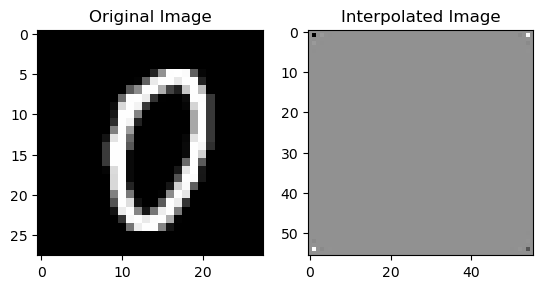

In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

# Function to compute divided differences
def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:, 0] = y  # the first column is y
    
    for j in range(1, n):
        for i in range(n - j):
            coef[i, j] = (coef[i + 1, j - 1] - coef[i, j - 1]) / (x[i + j] - x[i])
    
    return coef[0, :]  # return only the first row (Newton's coefficients)

# Function to evaluate Newton polynomial at given points
def newton_poly(x, x_data, coef):
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1, n+1):
        p = coef[n-k] + (x - x_data[n-k]) * p
    return p

# Function to interpolate 1D data using Newton's method
def interpolate_1d(x_vals, y_vals, new_x_vals):
    coef = divided_diff(x_vals, y_vals)
    return newton_poly(new_x_vals, x_vals, coef)

# Function to apply Newton's interpolation to 2D image
def interpolate_image_newton(image_array, scale_factor=2):
    # Step 1: Interpolate along rows
    interpolated_rows = []
    x_vals = np.arange(image_array.shape[1])  # Original x-values
    
    for row in image_array:
        new_x_vals = np.linspace(0, image_array.shape[1] - 1, num=scale_factor * image_array.shape[1])  # Double the number of x-values
        interpolated_row = interpolate_1d(x_vals, row, new_x_vals)
        interpolated_rows.append(interpolated_row)
    
    interpolated_rows = np.array(interpolated_rows)

    # Step 2: Interpolate along columns
    interpolated_image = []
    x_vals = np.arange(interpolated_rows.shape[0])

    for i in range(interpolated_rows.shape[1]):
        new_x_vals = np.linspace(0, interpolated_rows.shape[0] - 1, num=scale_factor * interpolated_rows.shape[0])  # Double the number of y-values
        interpolated_column = interpolate_1d(x_vals, interpolated_rows[:, i], new_x_vals)
        interpolated_image.append(interpolated_column)

    interpolated_image = np.array(interpolated_image).T  # Transpose to get correct shape
    
    return interpolated_image

# Step 3: Load and process the image
image = cv2.imread(r'D:\GIKI\7th semester\CE442L\Mid exam prep\img.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
image_array = np.array(gray_image)  # Ensure you're working with a 2D grayscale image

# Step 4: Apply Newton's interpolation to double the size
interpolated_image = interpolate_image_newton(image_array, scale_factor=2)  # Doubling the pixel count

# Step 5: Visualize the original and interpolated images
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_array, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Interpolated Image")
plt.imshow(interpolated_image, cmap='gray')
plt.show()
